## Exploritory Data Analysis Introduction

In [1]:
#%%
import numpy as np 
import pandas as pd 
import statistics
import math
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import mean_absolute_error as mae
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train_extended.csv')
print(data.shape)
data.head()

(200000, 10)


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


## Preprocessing

First we can preprocess the data to remove any invalid datapoints and split the data based on gender.

In [3]:
# Separate by sex and combine into dictionary for easier access
uncleaned_data = {"Male" : data[data['Sex']=='M'],
                  "Female" : data[data['Sex']=='F'],
                  "Indeterminate" : data[data['Sex']=='I']}

# Get variable categories and genders
categories = list(data.columns[2:9])
allGenders = uncleaned_data.keys()

# Create new dictonary to store cleaned data
cleaned_data = {gender:None for gender in allGenders}

# Remove any data with invalid entries (value <= 0)
for gender in allGenders:
    for var in categories:
        cleaned_data[gender] = uncleaned_data[gender][uncleaned_data[gender][var] > 0]

# Data without id, sex, and age
X_data = {gender: cleaned_data[gender].drop(['id','Sex','Age'],axis=1) for gender in allGenders}

# Age only data
y_data = {gender: cleaned_data[gender]['Age'] for gender in allGenders}

### Visualizing Data

We can first visualize our data by creating scatterplots between independent variables and crab age. 

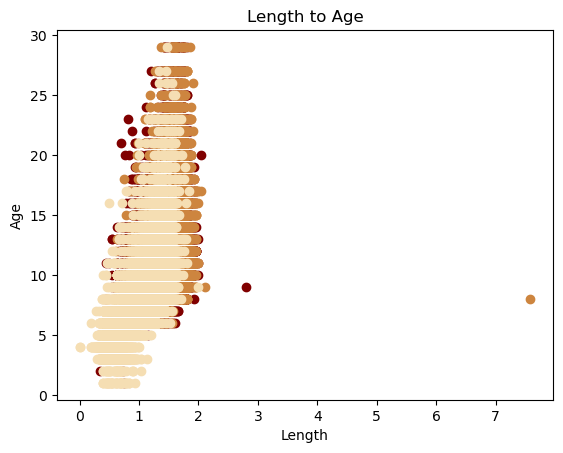

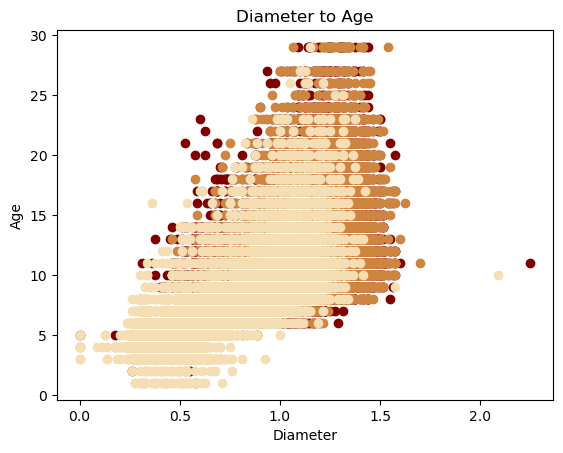

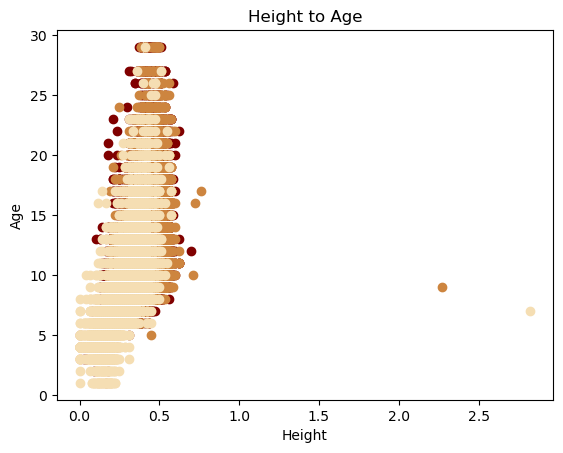

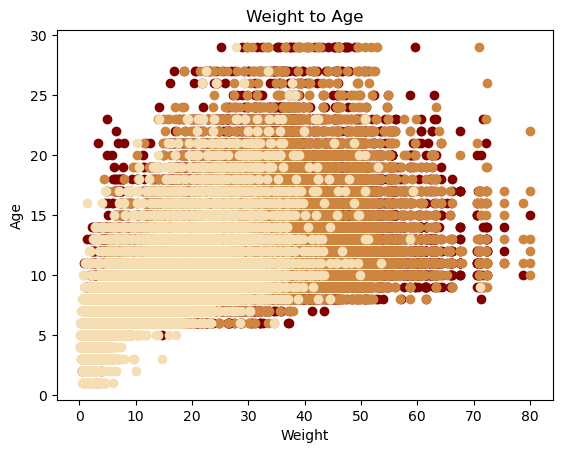

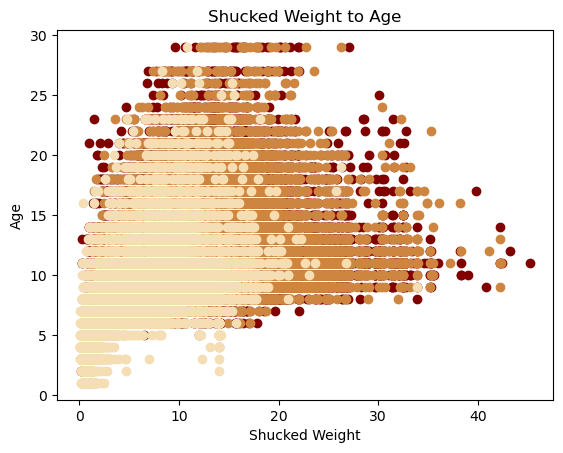

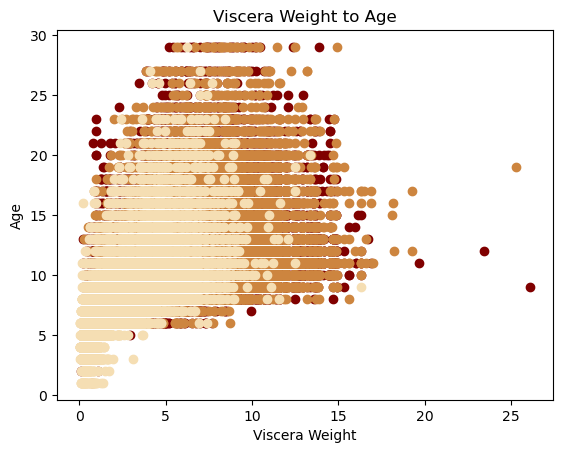

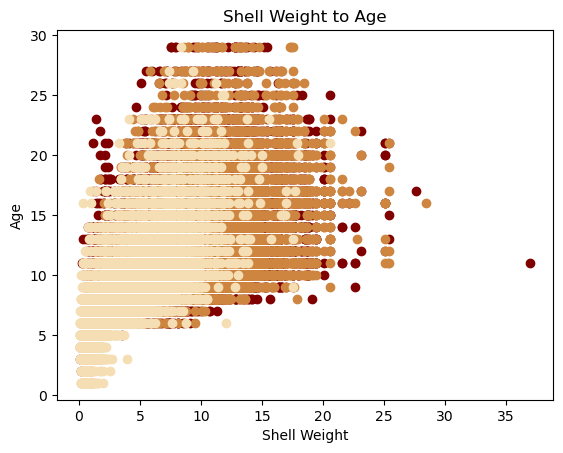

In [4]:
# Draw the scatterplot

# Colors of plots: maroon = male, peru = female, wheat = indeterminate
colors = ["maroon", "peru", "wheat"]

for var in categories:

    # Title/axis of plot
    plt.title("{} to Age".format(var))
    plt.xlabel(var)
    plt.ylabel("Age")

    for i, gender in enumerate(allGenders):
        
        # Get age data, (dependent variable)
        gender_y = y_data[gender]

        # Get data without id, sex, and age
        gender_X = X_data[gender]

        # Plot data for specific gender
        plt.scatter(gender_X[var], gender_y, c = colors[i])

    # Show plot
    plt.show()

-----------------------------------------------------------

## Mean Values

### Calculating Mean Value of Independent Variables

We can start exploring the data by first looking at each indepenent variable based on categorical values. In this case, the categorical value is the crab's sex.

In [5]:
# Create a dictionary to store results
all_avgs = {gender:[] for gender in allGenders}
all_errors = {gender:[] for gender in allGenders}

for gender in allGenders:

    for var in categories:

        # Turn data into numpy array, then compute mean using built-in numpy function
        avg = np.mean(np.array(X_data[gender][var]))
        error = statistics.stdev(np.array(X_data[gender][var]))

        # Record results
        all_avgs[gender].append(avg)
        all_errors[gender].append(error)

In [6]:
# Show average values for each variable per gender
for gender in allGenders:
    print("{} Only Data".format(gender))

    for i, var in enumerate(categories):
        print("Variable {} Average: {:.3f}".format(var, all_avgs[gender][i]))

    print("\n")

Male Only Data
Variable Length Average: 1.434
Variable Diameter Average: 1.122
Variable Height Average: 0.383
Variable Weight Average: 28.230
Variable Shucked Weight Average: 12.226
Variable Viscera Weight Average: 6.101
Variable Shell Weight Average: 8.039


Female Only Data
Variable Length Average: 1.470
Variable Diameter Average: 1.151
Variable Height Average: 0.396
Variable Weight Average: 30.006
Variable Shucked Weight Average: 12.804
Variable Viscera Weight Average: 6.519
Variable Shell Weight Average: 8.609


Indeterminate Only Data
Variable Length Average: 1.036
Variable Diameter Average: 0.791
Variable Height Average: 0.260
Variable Weight Average: 11.274
Variable Shucked Weight Average: 4.982
Variable Viscera Weight Average: 2.393
Variable Shell Weight Average: 3.300




### Visualizing Mean Value of Independent Variables

We can use Matplotlib to plot the mean value of each independent variable based on the crab's sex.

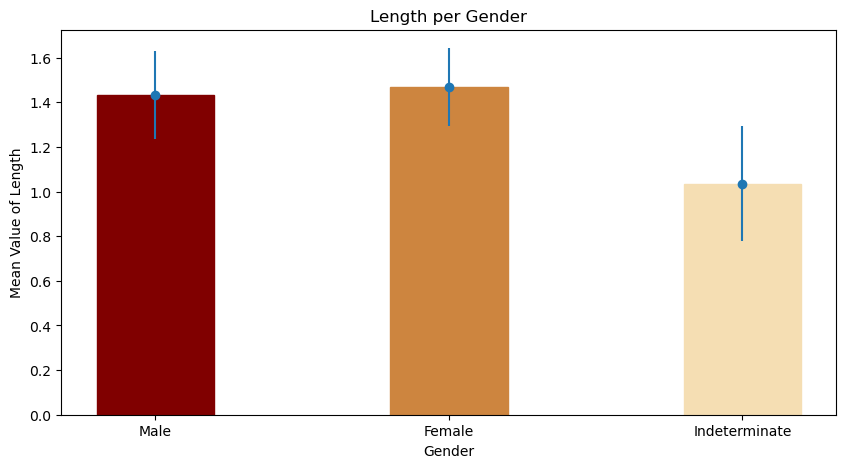

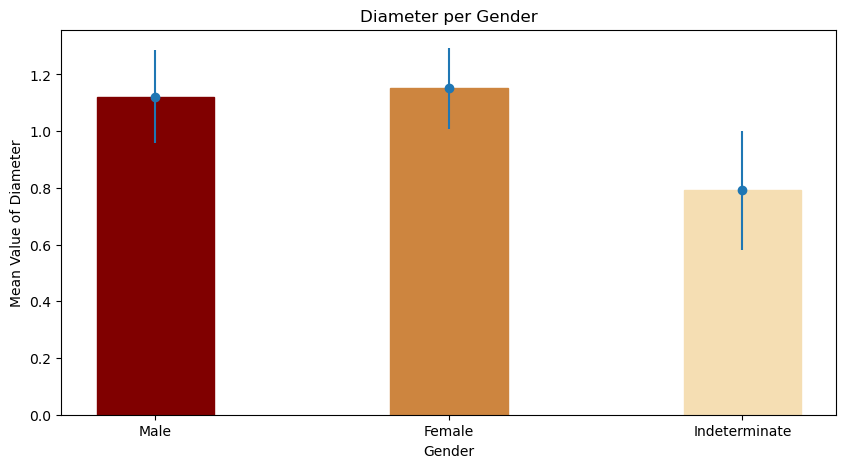

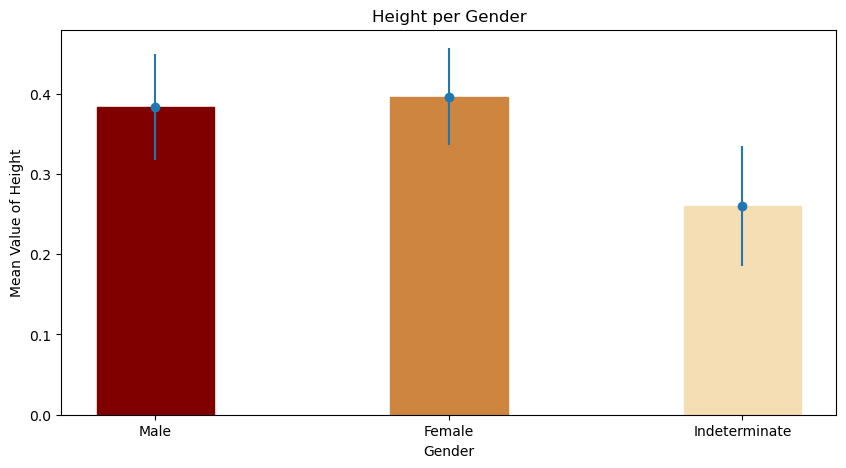

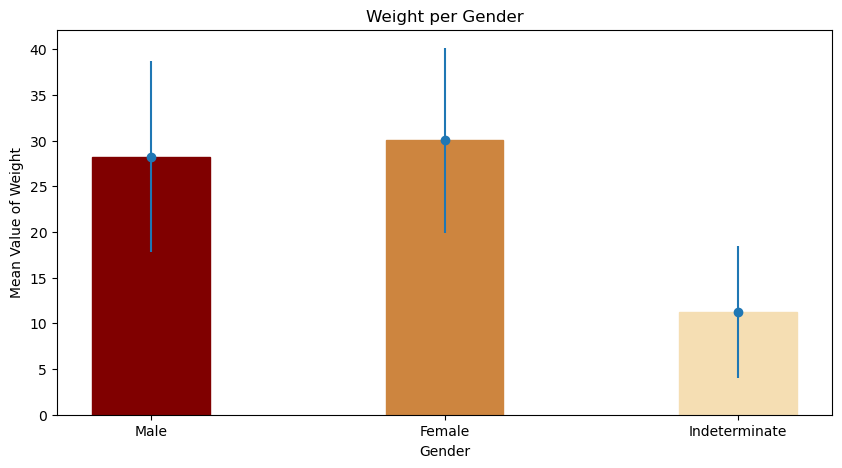

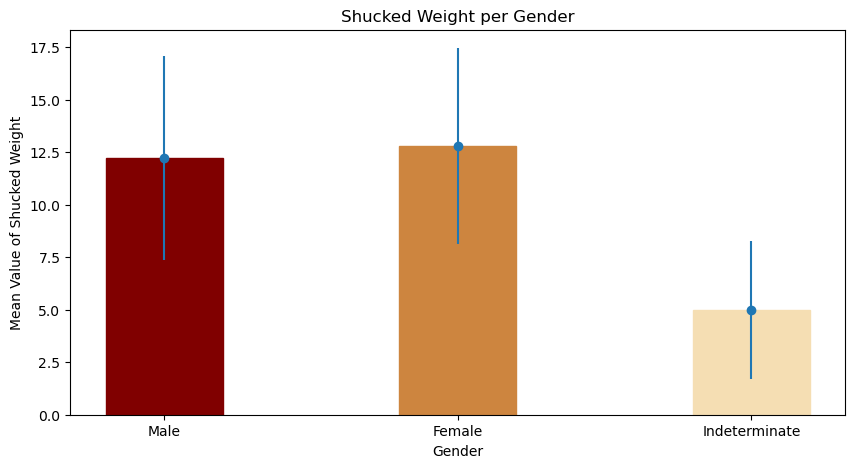

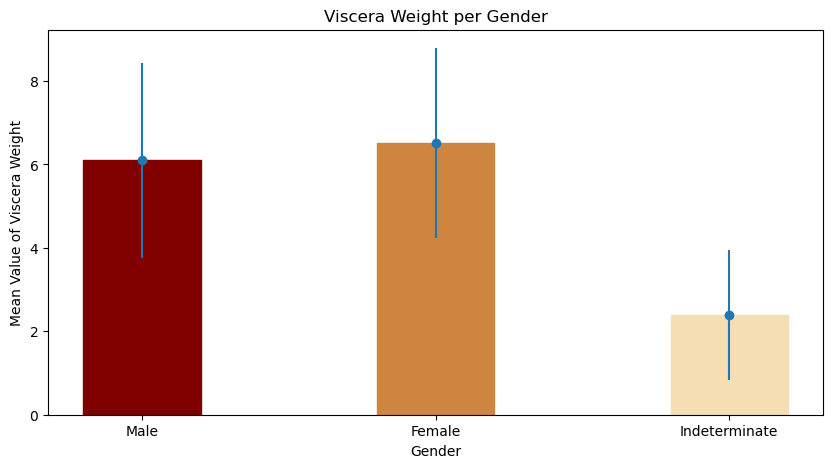

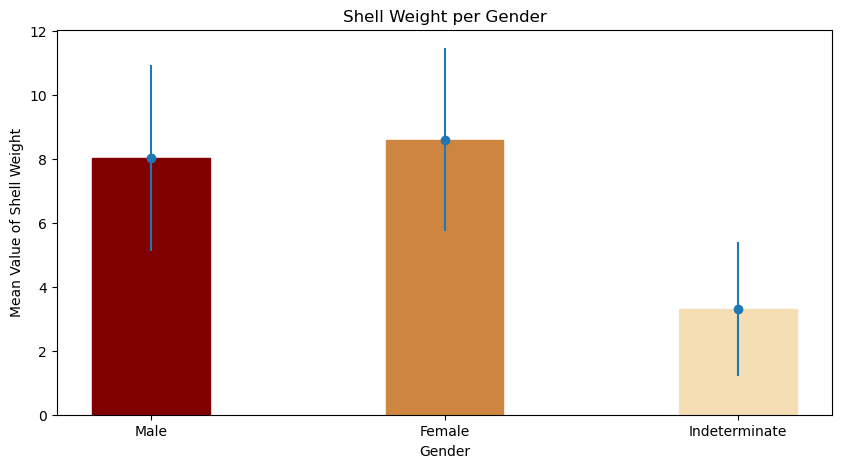

In [7]:
# Bar chart visualization

for i, var in enumerate(categories):

    # Create figure
    fig = plt.figure(figsize = (10, 5))
    
    # Create the bar plot
    avg_values = [all_avgs[gender][i] for gender in allGenders]
    error_values = [all_errors[gender][i] for gender in allGenders]
    bar_plt = plt.bar(allGenders, avg_values, width = 0.4)
    plt.errorbar(allGenders, avg_values, error_values, linestyle='None', marker='o')
    
    # Set color of bars (based on gender)
    bar_plt[0].set_color("maroon")
    bar_plt[1].set_color("peru")
    bar_plt[2].set_color("wheat")

    plt.xlabel("Gender")
    plt.ylabel("Mean Value of {}".format(var))
    plt.title("{} per Gender".format(var))
    plt.show()

### Calculate Mean Value of Age
We can use a similar process to look at the age (dependent variable)

In [8]:
# Dictionary to store results
age_avg = {gender:None for gender in allGenders}
age_error = {gender:None for gender in allGenders}

# Compute Mean and SD of age per gender
for gender in allGenders:
    
    # Compute average and error
    avg = np.mean(np.array(y_data[gender]))
    error = statistics.stdev(y_data[gender])

    # Store average and error
    age_avg[gender] = avg
    age_error[gender] = error


In [9]:
# Show average age per gender
for gender in allGenders:
    print("{} Age Average: {:.3f}".format(gender, age_avg[gender]))

Male Age Average: 10.935
Female Age Average: 11.447
Indeterminate Age Average: 7.511


### Visualizing Mean Value of Age

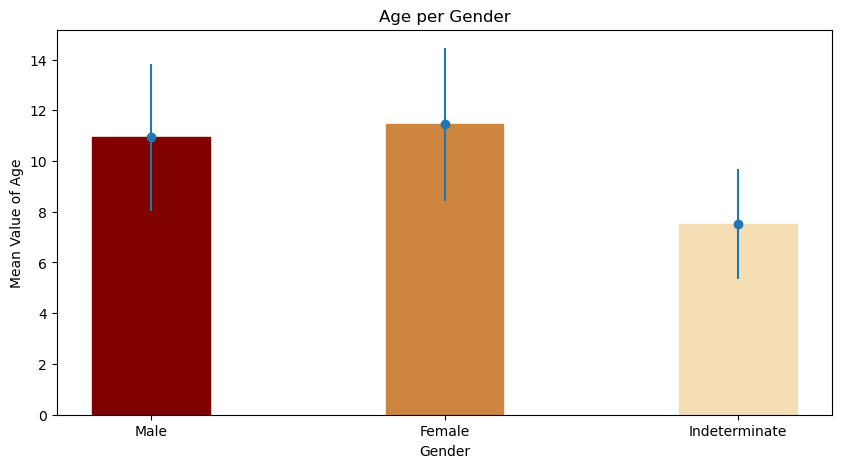

In [10]:
# Bar chart visualization

# Create figure
fig = plt.figure(figsize = (10, 5))

for gender in allGenders:
    
    # Get average and SD for each gender
    avg_value = [age_avg[gender] for gender in allGenders]
    error_value = [age_error[gender] for gender in allGenders]

# Create the bar chart
bar_plt = plt.bar(allGenders, avg_value, width = 0.4)
plt.errorbar(allGenders, avg_value, error_value, linestyle='None', marker='o')

# Set color of bars (based on gender)
bar_plt[0].set_color("maroon")
bar_plt[1].set_color("peru")
bar_plt[2].set_color("wheat")

plt.xlabel("Gender")
plt.ylabel("Mean Value of Age")
plt.title("Age per Gender")
plt.show()

-----------------------------------------------------------

## Calculating Correlation Between Variables
Now that we have a basic understanding of the data, let's look for correlations between different variables. Since we want to predict the average age, we'll experiment with data from variables 'length' through 'shell weight'. This will be the X variable and we can set age as the y variable. We use Pearson R to find the correlation coefficient. R values closer to 1 or -1 have a strong correlation, while an R value of 0 has no correlation.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [11]:
# Calculate correlation between variables and age

for gender in allGenders:
    print("Correlation Coefficients {}".format(gender))
    for var in categories:
        gender_X = X_data[gender][var]
        gender_y = y_data[gender]

        # Compute correlation
        corr, _ = pearsonr(gender_X, gender_y)

        print('{}: {:.3f}'.format(var, corr))
    print("\n")


Correlation Coefficients Male
Length: 0.340
Diameter: 0.353
Height: 0.428
Weight: 0.361
Shucked Weight: 0.196
Viscera Weight: 0.313
Shell Weight: 0.481


Correlation Coefficients Female
Length: 0.231
Diameter: 0.250
Height: 0.345
Weight: 0.277
Shucked Weight: 0.086
Viscera Weight: 0.221
Shell Weight: 0.414


Correlation Coefficients Indeterminate
Length: 0.720
Diameter: 0.725
Height: 0.731
Weight: 0.730
Shucked Weight: 0.661
Viscera Weight: 0.715
Shell Weight: 0.766




### Visualizing Correlation

We can use the scatterplot from Matplotlib to visualize the data.

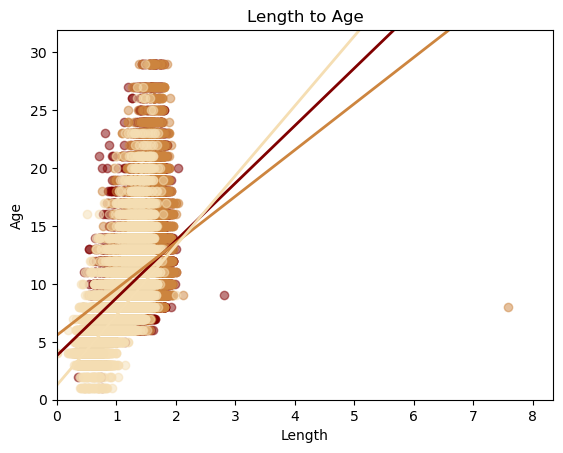

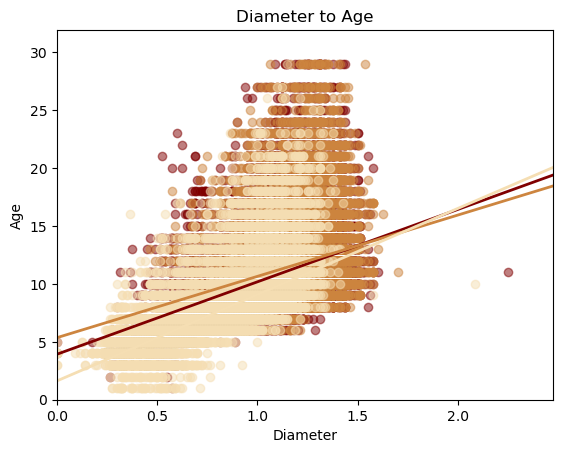

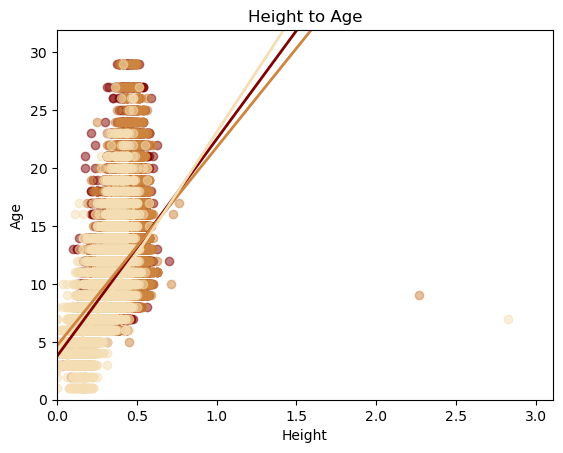

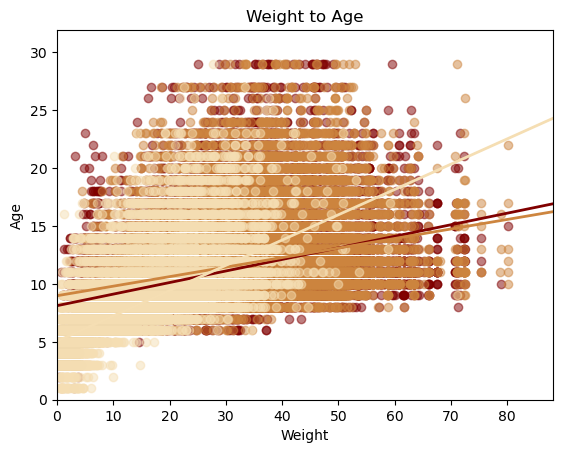

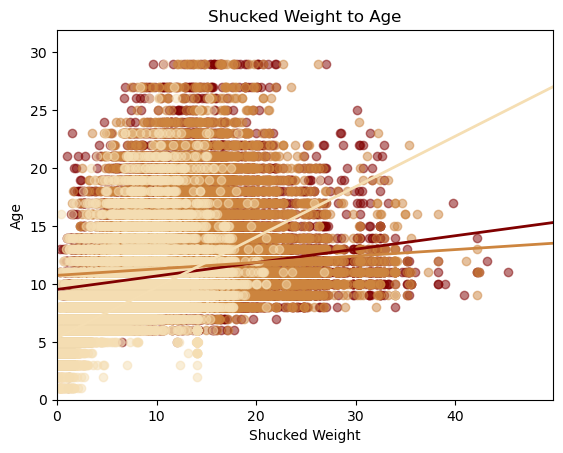

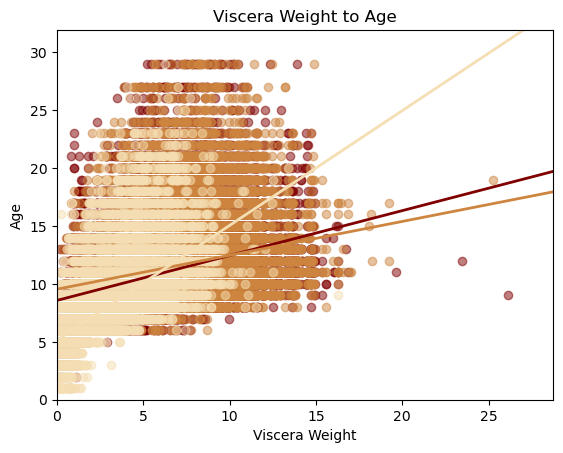

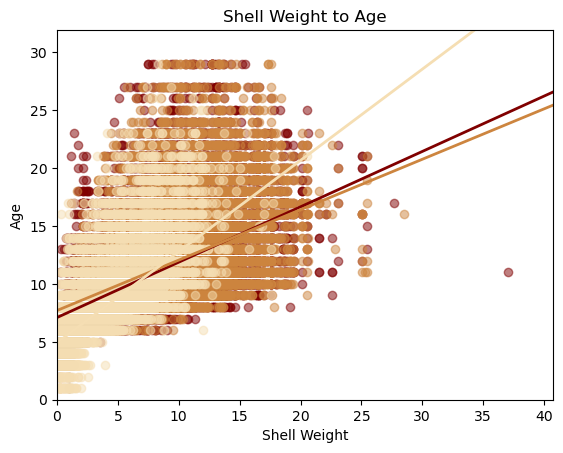

In [12]:
# Plot correlation

for var in categories:

    # Title and labels of plot
    plt.title("{} to Age".format(var))
    plt.xlabel(var)
    plt.ylabel("Age")

    # Limits of axis (used to scale plots)
    X_max = 0
    y_max = 0

    for i, gender in enumerate(allGenders):
        
        gender_X = X_data[gender][var]
        gender_y = y_data[gender]

        # Update max X/y of plot
        X_max = max(np.max(gender_X), X_max)
        y_max = max(np.max(gender_y), y_max)

        # Calculate line of best fit
        lsq = np.polyfit(gender_X, gender_y, 1)

        # Plot points on scatterplot
        plt.scatter(gender_X, gender_y, c = colors[i], alpha = 0.5)

        # Extend line of best fit to edge of graph
        x_extend = np.linspace(0, 100, 100)

        # Draw line of best fit
        plt.plot(x_extend, np.polyval(lsq, x_extend), color = colors[i], linestyle = '-', linewidth = 2)

    # Set limit of plot axis and show plot
    plt.xlim(0, X_max + 0.1 * X_max)
    plt.ylim(0, y_max + 0.1 * y_max)
    plt.show()
    print("\n")

---------

## Removing Outliers

In the above example, there are clearly data points that lie far outside the range of the majority. To fix this, we can remove any data that is outside 2 standard deviations of the mean.

In [13]:
# Create copy of 'data' dataframe
no_outlier_data = cleaned_data.copy()
        
# Remove outliers from data
for i, var in enumerate(categories):
    for gender in allGenders:

        # Get avg and standard deviation for specific variable
        avg = all_avgs[gender][i]
        std = all_errors[gender][i]

        # Make alias to gender specific dataframe (for clarity)
        df = no_outlier_data[gender]

        # Keep values that are between 2 * SD of the mean
        no_outlier_data[gender] = df.loc[(df[var] >= avg - 2 * std) & (df[var] <= avg + 2 * std)]

# Separate into X and y (similar to before)
new_X_data = {gender:no_outlier_data[gender].drop(['id','Sex','Age'],axis=1) for gender in allGenders}
new_y_data = {gender:no_outlier_data[gender]['Age'] for gender in allGenders}

### Recomputing Correlation
We can recompute the correlation with outliers removed

In [14]:
# Recompute correlation without outliers

for gender in allGenders:
    print("Correlation Coefficients {}".format(gender))
    for var in categories:
        gender_X = new_X_data[gender][var]
        gender_y = new_y_data[gender]

        corr, _ = pearsonr(gender_X, gender_y)

        print('{}: {:.3f}'.format(var, corr))
    print("\n")


Correlation Coefficients Male
Length: 0.224
Diameter: 0.243
Height: 0.348
Weight: 0.273
Shucked Weight: 0.072
Viscera Weight: 0.215
Shell Weight: 0.420


Correlation Coefficients Female
Length: 0.172
Diameter: 0.191
Height: 0.311
Weight: 0.226
Shucked Weight: 0.007
Viscera Weight: 0.162
Shell Weight: 0.380


Correlation Coefficients Indeterminate
Length: 0.676
Diameter: 0.680
Height: 0.687
Weight: 0.673
Shucked Weight: 0.617
Viscera Weight: 0.664
Shell Weight: 0.706




### Visualizing Correlation (without outliers)

And then redo our plot above with outliers removed

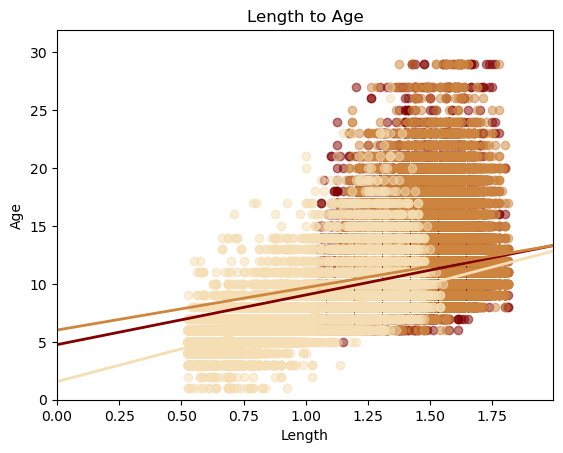

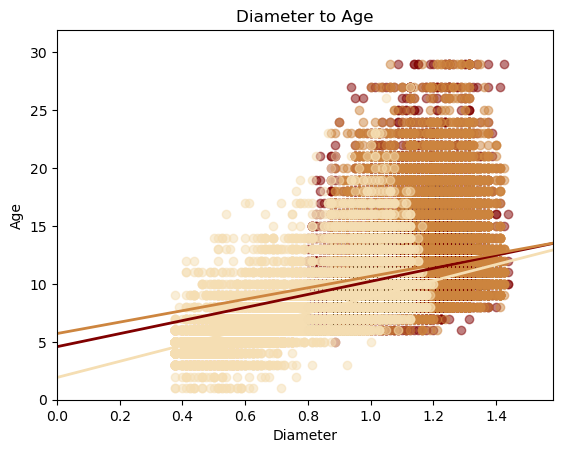

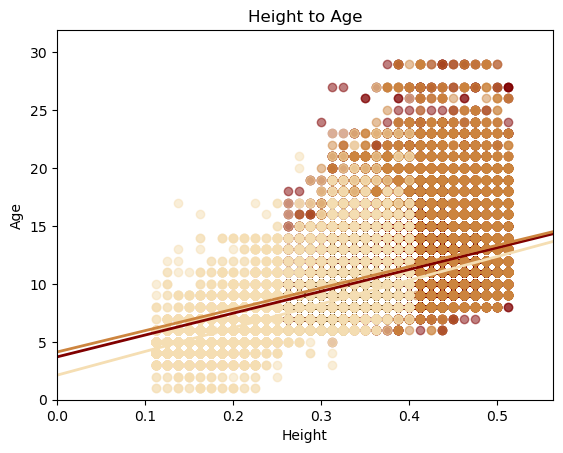

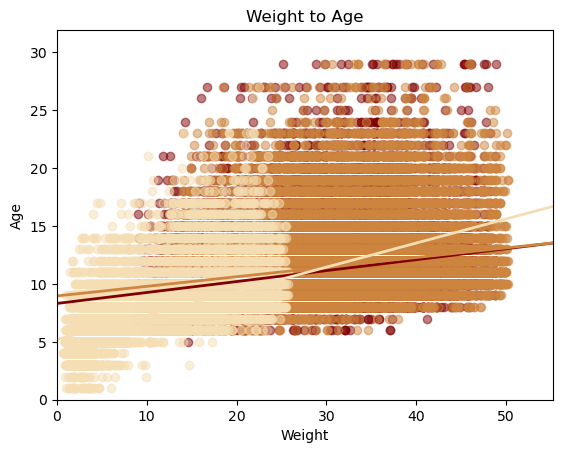

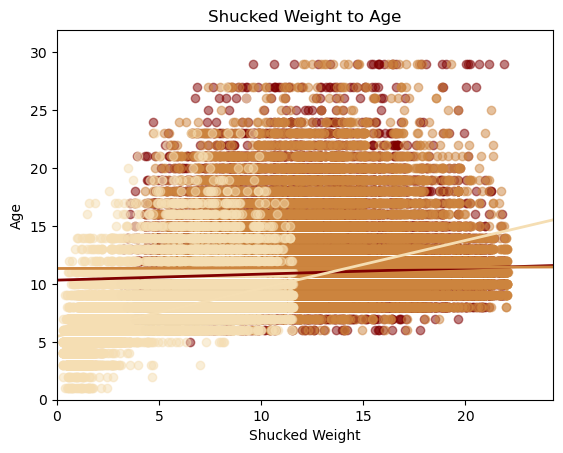

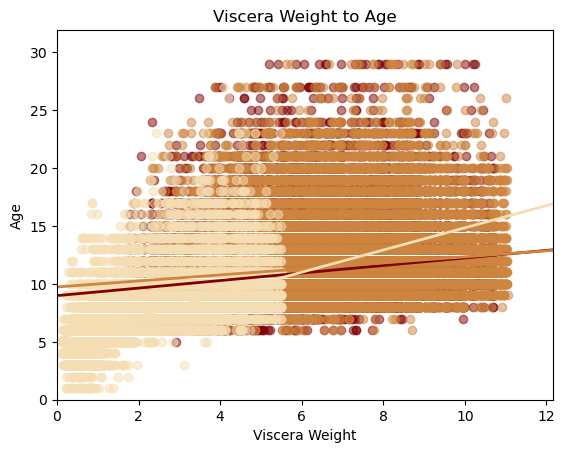

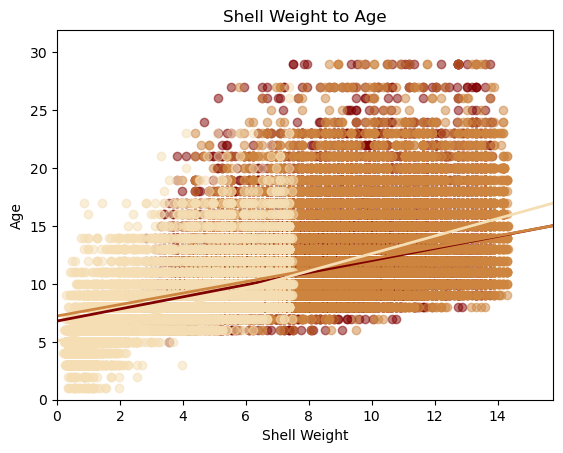

In [15]:
# Plot with outliers removed

for var in categories:

    # Title and labels of plot
    plt.title("{} to Age".format(var))
    plt.xlabel(var)
    plt.ylabel("Age")

    # Limits of axis (used to scale plots)
    X_max = 0
    y_max = 0
    
    for i, gender in enumerate(allGenders):

        gender_X = new_X_data[gender][var]
        gender_y = new_y_data[gender]

        # Update max X/y of plot
        X_max = max(np.max(gender_X), X_max)
        y_max = max(np.max(gender_y), y_max)
        
        # Calculate line of best fit
        lsq = np.polyfit(gender_X, gender_y, 1)

        # Plot points on scatterplot
        plt.scatter(gender_X, gender_y, c = colors[i], alpha = 0.5)

        # Extend line of best fit to edge of graph
        x_extend = np.linspace(-100, 100, 100)

        # Draw line of best fit
        plt.plot(x_extend, np.polyval(lsq, x_extend), color = colors[i], linestyle = '-', linewidth = 2)

    # Set limit of plot axis and show plot
    plt.xlim(0, X_max + 0.1 * X_max)
    plt.ylim(0, y_max + 0.1 * y_max)
    plt.show()
    print("\n")




### Results
Compared to the graphs with outliers, we see that removing outliers significantly improved the accuracy of the line of best fit